In [86]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [87]:
def toFixed(numObj, digits=0):
    return f"{numObj:.{digits}f}"

In [88]:
def p(x):
    return math.exp(x)

In [89]:
def q(x):
    return x * 2

In [90]:
def f(x):
    return x ** 3

In [91]:
alpha0 = 2
alpha1 = -2.5
Ac = 0
beta0 = 3
beta1 = -3.4
Bc = 5
a0 = 0.1
b0 = 1.3
n = 15

In [92]:
A = np.zeros((n + 1, n + 1))
B = np.zeros(n + 1)
X = np.zeros(n + 1)
h = (b0 -  a0) / n

for i in range (n + 1):
    X[i] = a0 + i * h

for i in range (n - 1):
    A[i][i] = h * h * q(X[i]) - h * p(X[i]) + 1
    A[i][i + 1] = h * p(X[i]) - 2
    A[i][i + 2] = 1
    B[i] = h * h * f(X[i])
    
A[n - 1][0] = alpha0 * h - alpha1
A[n - 1][1] = alpha1
A[n][n - 1] = -beta1
A[n][n] = beta0 * h + beta1
B[n - 1] = h * Ac
B[n] = h * Bc

In [93]:
print(A)
print(B)

[[ 0.91286633 -1.91158633  1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.90652661 -1.90422261  1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.89957359 -1.89624559  1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.89195619 -1.88760419  1.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.88361908 -1.87824308
   1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.8745023
  -1

In [94]:
#Метод Гаусса с выбором главного элемента
def Metod_Gaussa(arr, brr):
    for k in range(arr.shape[0] - 1):
        # Поиск строки с максимальным элементом
        max_elem = 0
        str = 0
        for i in range (k, arr.shape[0]):
            if abs(arr[i,k]) > abs(max_elem):
                max_elem = arr[i,k]
                str = i
        # Меняем местами строки квадратной матрицы
        change = np.repeat(arr[k], 1)
        arr[k], arr[str] = arr[str], change
        # Меняем местами элементы вектора-столбца
        change = np.repeat(brr[k], 1)
        brr[k], brr[str] = brr[str], change
        # Делим полученную строку на max_elem
        arr[k] = arr[k] / max_elem
        brr[k] = brr[k] / max_elem
        # Домножаем строку на коэффициенты и вычитаем ее из остальных строк
        for i in range (k + 1, arr.shape[0]):
            factor = arr[i,k]
            arr[i] = arr[i] - arr[k] * factor
            brr[i] = brr[i] - brr[k] * factor

    # Находим аргументы уравнений
    arg = [brr[brr.shape[0] - 1] / (arr[arr.shape[0] - 1, arr.shape[0] - 1])]
    for i in range(arr.shape[0] - 2, -1, -1):
        n = brr[i]
        for j in range(len(arg)):
            n = n - arg[j] * arr[i, arr.shape[0] - 1 - j]
        arg.append(n)

    # Переворачиваем значения в списке
    otv = []
    print("Answer:")
    for i in reversed(arg): otv.append(i)
    print("\n".join("X{0} =\t{1:10.15f}".format(i + 1, x) for i, x in enumerate(otv)))
    return otv

In [95]:
otv = Metod_Gaussa(A, B)

Answer:
X1 =	1.058470625606923
X2 =	1.126212745645766
X3 =	1.186617093604174
X4 =	1.238678601461906
X5 =	1.281501923160294
X6 =	1.314372899373912
X7 =	1.336826415481199
X8 =	1.348706377863845
X9 =	1.350213012188257
X10 =	1.341932547469145
X11 =	1.324844724305091
X12 =	1.300304564300222
X13 =	1.269996517383059
X14 =	1.235861435994444
X15 =	1.199999664948888
X16 =	1.164556601527285


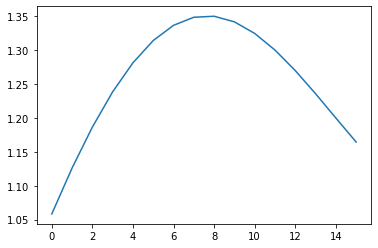

In [96]:
plt.plot(otv)

In [101]:
def p(x):
    return math.exp(x)

In [102]:
def q(x):
    return x / 2

In [103]:
def f(x):
    return x ** 2

In [104]:
alpha0 = 1
alpha1 = -1.2
Ac = 0
beta0 = 2
beta1 = -2.5
Bc = -4
a0 = 0.1
b0 = 1.1
n = 20

In [105]:
A = np.zeros((n + 1, n + 1))
B = np.zeros(n + 1)
X = np.zeros(n + 1)
h = (b0 -  a0) / n

for i in range (n + 1):
    X[i] = a0 + i * h

for i in range (n - 1):
    A[i][i] = h * h * q(X[i]) - h * p(X[i]) + 1
    A[i][i + 1] = h * p(X[i]) - 2
    A[i][i + 2] = 1
    B[i] = h * h * f(X[i])
    
A[n - 1][0] = alpha0 * h - alpha1
A[n - 1][1] = alpha1
A[n][n - 1] = -beta1
A[n][n] = beta0 * h + beta1
B[n - 1] = h * Ac
B[n] = h * Bc

In [106]:
print(A)
print(B)

[[ 0.94486645 -1.94474145  1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.94209579 -1.94190829  1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.93917986 -1.93892986  1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.93611123 -1.93579873  1.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0

In [107]:
#Метод Гаусса с выбором главного элемента
def Metod_Gaussa(arr, brr):
    for k in range(arr.shape[0] - 1):
        # Поиск строки с максимальным элементом
        max_elem = 0
        str = 0
        for i in range (k, arr.shape[0]):
            if abs(arr[i,k]) > abs(max_elem):
                max_elem = arr[i,k]
                str = i
        # Меняем местами строки квадратной матрицы
        change = np.repeat(arr[k], 1)
        arr[k], arr[str] = arr[str], change
        # Меняем местами элементы вектора-столбца
        change = np.repeat(brr[k], 1)
        brr[k], brr[str] = brr[str], change
        # Делим полученную строку на max_elem
        arr[k] = arr[k] / max_elem
        brr[k] = brr[k] / max_elem
        # Домножаем строку на коэффициенты и вычитаем ее из остальных строк
        for i in range (k + 1, arr.shape[0]):
            factor = arr[i,k]
            arr[i] = arr[i] - arr[k] * factor
            brr[i] = brr[i] - brr[k] * factor

    # Находим аргументы уравнений
    arg = [brr[brr.shape[0] - 1] / (arr[arr.shape[0] - 1, arr.shape[0] - 1])]
    for i in range(arr.shape[0] - 2, -1, -1):
        n = brr[i]
        for j in range(len(arg)):
            n = n - arg[j] * arr[i, arr.shape[0] - 1 - j]
        arg.append(n)

    # Переворачиваем значения в списке
    otv = []
    print("Answer:")
    for i in reversed(arg): otv.append(i)
    print("\n".join("X{0} =\t{1:10.15f}".format(i + 1, x) for i, x in enumerate(otv)))
    return otv

In [108]:
otv = Metod_Gaussa(A, B)

Answer:
X1 =	-1.260134149259742
X2 =	-1.312639738812232
X3 =	-1.362061429065572
X4 =	-1.408309758764393
X5 =	-1.451293181233226
X6 =	-1.490920666555134
X7 =	-1.527104341429886
X8 =	-1.559762134572840
X9 =	-1.588820390426023
X10 =	-1.614216409241327
X11 =	-1.635900867492020
X12 =	-1.653840069326168
X13 =	-1.668017977663397
X14 =	-1.678437972829800
X15 =	-1.685124287591838
X16 =	-1.688123070331232
X17 =	-1.687503033096926
X18 =	-1.683355648508559
X19 =	-1.675794869009794
X20 =	-1.664956353707521
X21 =	-1.650996201778668


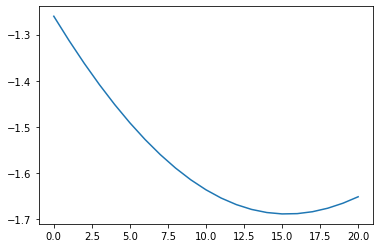

In [109]:
plt.plot(otv)